<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
from google.colab import files
files.upload()

Saving car1.jpg to car1.jpg


{'car1.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x10\x10\x13\x10\x13\x16\x16\x16\x16\x16\x16\x1a\x18\x1a\x1b\x1b\x1b\x1a\x1a\x1a\x1a\x1b\x1b\x1b\x1d\x1d\x1d"""\x1d\x1d\x1d\x1b\x1b\x1d\x1d  ""%&%##"#&&(((00..88:EES\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7

In [67]:
weight_file = '/content/gdrive/MyDrive/yolo/yolov3.weights'
cfg = '/content/gdrive/MyDrive/yolo/yolov3.cfg'
names = '/content/gdrive/MyDrive/yolo/coco.names'
image = cv.imread('car1.jpg')
height, width, channels = image.shape
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [55]:
classes = []
with open(names, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

In [56]:
net = cv.dnn.readNet(weight_file, cfg)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
blob = cv.dnn.blobFromImage(image, 0.00392, (416,416), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [58]:
class_ids =[]
boxes = []
confidences = []

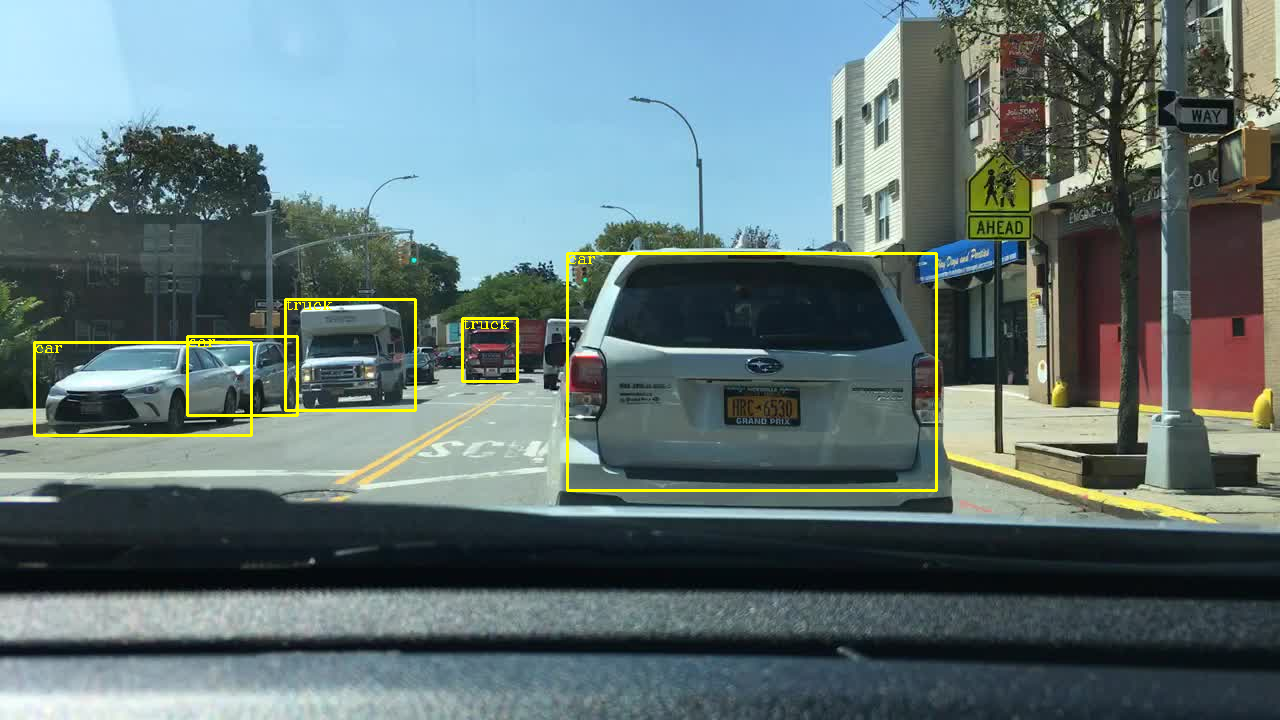

In [68]:


for out in outs :
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      centerx = int(detection[0]*width)
      centery = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)
      x = int(centerx-w/2)
      y = int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv.FONT_HERSHEY_COMPLEX

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    color = colors[i]
    label = str(classes[class_ids[i]])
    cv.rectangle(image, (x,y), (x+w, y+h), (0,255,255), 2)
    cv.putText(image, label, (x,y+10), font, 0.5, (0,255,255), 1)

cv_imshow(image)